In [334]:
%matplotlib inline

In [335]:
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
import cv2
from keras.layers import Flatten

In [336]:
def show_difference(image, kernel):
    convolved = convolve2d(image, kernel)
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(121)
    plt.title('Original image')
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(122)
    plt.title('Convolved image')
    plt.axis('off')
    plt.imshow(convolved, cmap='gray')
    return convolved

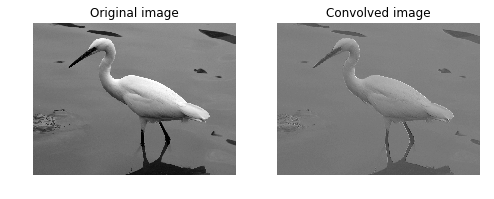

In [337]:
b_image = cv2.imread('D:/BIRD/3.jpg')
b_image = cv2.cvtColor(b_image, cv2.COLOR_BGR2GRAY)

# 橫向 edge detection
kernel = np.array([[1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dx = show_difference(b_image, kernel)

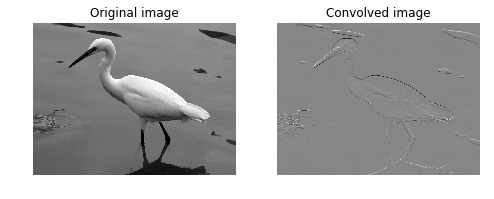

In [338]:
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
dy = show_difference(b_image, kernel)

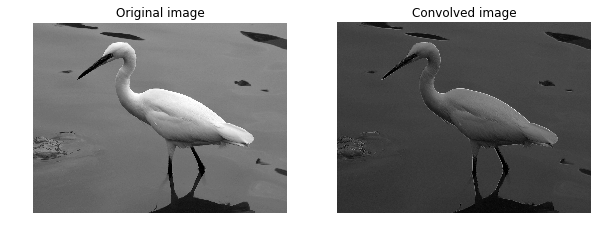

In [339]:
mag = np.hypot(dx, dy)
mag *= 255.0 / np.max(mag)

fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('Original image')
plt.axis('off')
plt.imshow(b_image, cmap='gray')
    
plt.subplot(122)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(mag, cmap='gray')

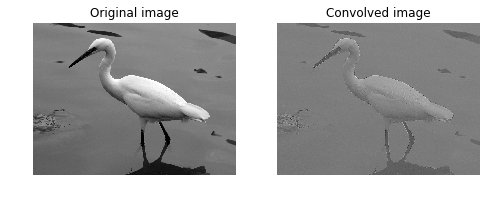

In [340]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
_ = show_difference(b_image, kernel)

In [341]:
#kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32)
#_ = show_difference(b_image, kernel)

In [342]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

(768, 1024, 3)
Original photo


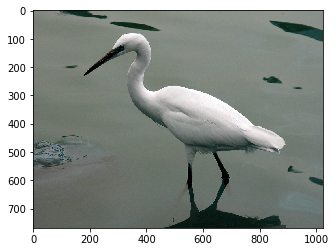

In [343]:
b = cv2.imread('D:/BIRD/3.jpg')
print(b.shape)
print("Original photo")
plt.imshow(b)

In [344]:
model = Sequential()
model.add(Conv2D(3, 
                 (15,15), 
                 padding="same", 
                 data_format="channels_last", 
                 input_shape=b.shape))
model.add(Activation("relu"))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 768, 1024, 3)      2028      
_________________________________________________________________
activation_35 (Activation)   (None, 768, 1024, 3)      0         
Total params: 2,028
Trainable params: 2,028
Non-trainable params: 0
_________________________________________________________________
None


In [345]:
b_batch = np.expand_dims(b, axis=0)
print(b_batch.shape)

(1, 768, 1024, 3)


In [346]:
conv_b = model.predict(b_batch)
print(conv_b.shape)
img = np.squeeze(conv_b, axis=0)
print(img.shape)
##plt.imshow(img)

(1, 768, 1024, 3)
(768, 1024, 3)


In [347]:
def show_img(model, img):
    plt.figure(figsize=(8, 8))
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)
    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    conv_img = conv_img.reshape(conv_img.shape[:2])
    plt.imshow(conv_img)

In [348]:
model = Sequential()
model.add(Conv2D(1, 
                 (3, 3),
                padding="same",
                data_format="channels_last", 
                input_shape=b.shape))


In [349]:
model.add(Activation("relu"))

In [350]:

model.add(MaxPooling2D(pool_size=(4,4), 
                       data_format="channels_last"))


(443, 605, 3)
Original photo


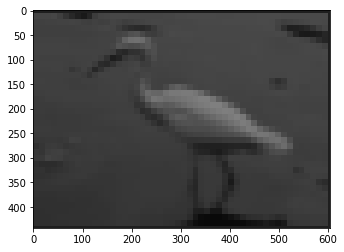

In [351]:
show_img(model, b)

In [352]:
model.add(Flatten())